In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import seaborn as sns



df=pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

df.head()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [ ]:
df.dropna(axis =1 , inplace=True)

df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income School_Type Peer_Influence  \
0             Yes                  0           Low      Public       Positive   
1             Yes                  2        Medium      Public       Negative   
2             Yes                  2        Medium      Public        Neutral   
3             Yes                  1        Medium      Public       Negative   
4             Yes                  3        Medium      Public        Neutral   

   Physical_Activity Learning_Disabilities  Gender  Exam_Score  
0                  3                    No    Male          67  
1                  4                    No  Female          61  
2                  4                    No    Male          74  
3                  4                    No    Male          71  
4                  4                    No  Female          70

In [ ]:
for column in df.select_dtypes(include=['object']).columns:

    unique_values = df[column].unique()

    mapping = {value: i for i, value in enumerate(unique_values)}

    df[column] = df[column].map(mapping)



df.head(10)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    0   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   
5             19          88                     1                    1   
6             29          84                     1                    2   
7             25          78                     0                    0   
8             17          94                     1                    0   
9             23          98                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 0   
1                           0            8               59                 0   
2                           1            7               91                 1   
3                           1            8               98                 1   
4                           1            6               65                 1   
5                           1            8               89                 1   
6                           1            7               68                 0   
7                           1            6               50                 1   
8                           0            6               80                 2   
9                           1            8               71                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  School_Type  \
0                0                  0              0            0   
1                0                  2              1            0   
2                0                  2              1            0   
3                0                  1              1            0   
4                0                  3              1            0   
5                0                  3              1            0   
6                0                  1              0            1   
7                0                  1              2            0   
8                0                  0              1            1   
9                0                  0              2            0   

   Peer_Influence  Physical_Activity  Learning_Disabilities  Gender  \
0               0                  3                      0       0   
1               1                  4                      0       1   
2               2                  4                      0       0   
3               1                  4                      0       0   
4               2                  4                      0       1   
5               0                  3                      0       0   
6               2                  2                      0       0   
7               1                  2                      0       0   
8               2                  1                      0       0   
9               0                  5                      0       0   

   Exam_Score  
0          67  
1          61  
2          74  
3          71  
4          70  
5          71  
6          67  
7          66  
8          69  
9          72

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  School_Type                 6607 non-null   int64
 12  Peer_Influence              6607 non-null   int64
 13  Physical_Activity           6607 non-null   int64
 14  Learning

In [ ]:
df.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6607.000000  6607.000000           6607.000000          6607.000000   
mean       19.975329    79.977448              1.086423             0.899803   
std         5.990594    11.547475              0.695521             0.698347   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              1.000000             0.000000   
50%        20.000000    80.000000              1.000000             1.000000   
75%        24.000000    90.000000              2.000000             1.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6607.000000   6607.00000      6607.000000   
mean                     0.596035      7.02906        75.070531   
std                      0.490728      1.46812        14.399784   
min                      0.000000      4.00000        50.000000   
25%                      0.000000      6.00000        63.000000   
50%                      1.000000      7.00000        75.000000   
75%                      1.000000      8.00000        88.000000   
max                      1.000000     10.00000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6607.000000      6607.000000        6607.000000    6607.000000   
mean           0.906463         0.075526           1.493719       0.787649   
std            0.695798         0.264258           1.230570       0.742617   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
count  6607.000000     6607.000000        6607.000000            6607.000000   
mean      0.304071        0.993038           2.967610               0.105191   
std       0.460048        0.889751           1.031231               0.306823   
min       0.000000        0.000000           0.000000               0.000000   
25%       0.000000        0.000000           2.000000               0.000000   
50%       0.000000        1.000000           3.000000               0.000000   
75%       1.000000        2.000000           4.000000               0.000000   
max       1.000000        2.000000           6.000000               1.000000   

            Gender   Exam_Score  
count  6607.000000  6607.000000  
mean      0.422733    67.235659  
std       0.494031     3.890456  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   101.000000

In [ ]:
!pip install numba==0.53.1
!pip install ydata-profiling
!pip install visions --upgrade
!pip install ydata-profiling --upgrade

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


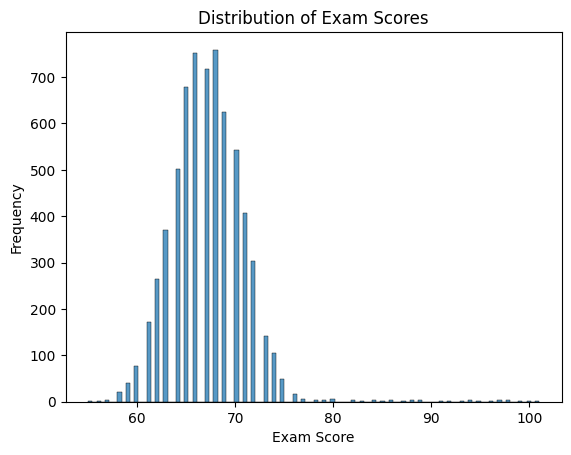

In [ ]:
sns.histplot(data=df, x='Exam_Score')

plt.title('Distribution of Exam Scores')

plt.xlabel('Exam Score')

plt.ylabel('Frequency')

plt.show()

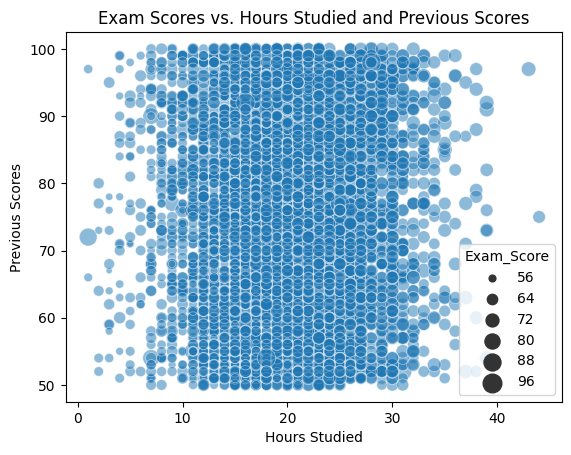

In [ ]:
sns.scatterplot(data=df, x='Hours_Studied', y='Previous_Scores', size='Exam_Score', sizes=(20, 200), alpha=0.5)

plt.title('Exam Scores vs. Hours Studied and Previous Scores')

plt.xlabel('Hours Studied')

plt.ylabel('Previous Scores')

plt.show()

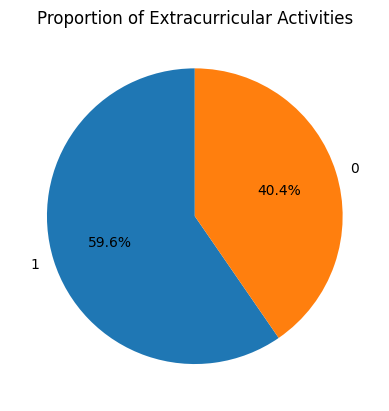

In [ ]:
category_counts = df['Extracurricular_Activities'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Proportion of Extracurricular Activities')

plt.show()

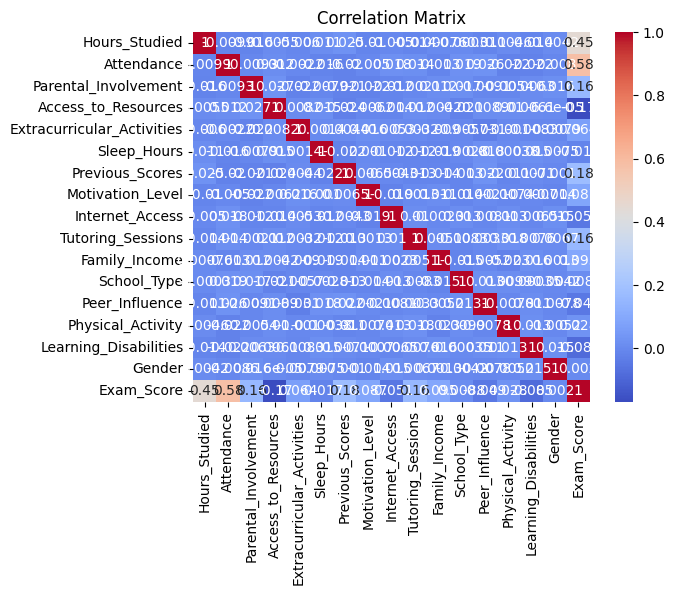

In [ ]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

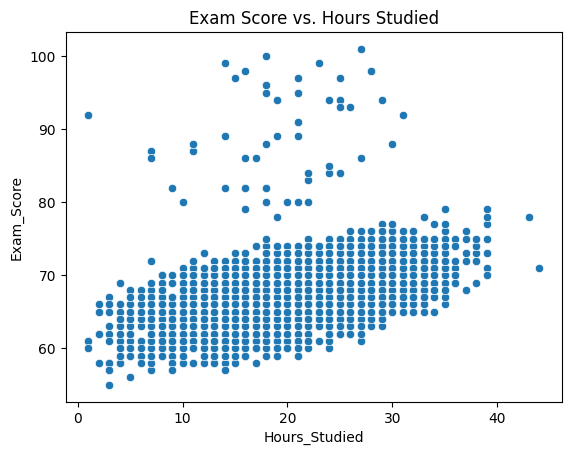

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt



sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')

plt.title('Exam Score vs. Hours Studied')

plt.show()

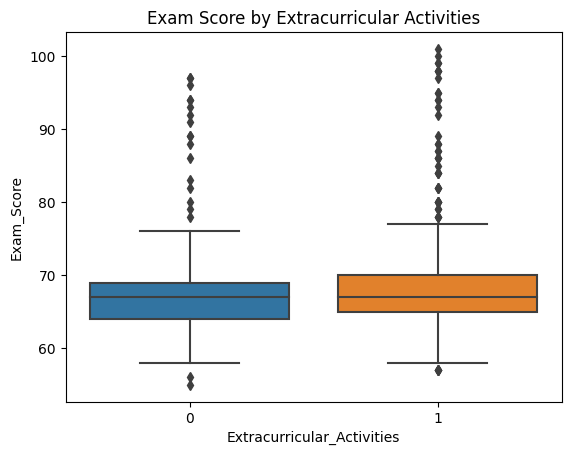

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt



sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score')

plt.title('Exam Score by Extracurricular Activities')

plt.show()

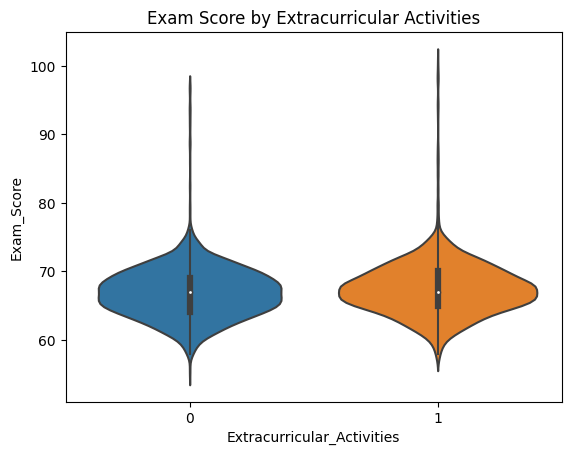

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt



sns.violinplot(data=df, x='Extracurricular_Activities', y='Exam_Score')

plt.title('Exam Score by Extracurricular Activities')

plt.show()

In [ ]:
import numpy as np





z = np.abs((df - df.mean()) / df.std())





threshold = 3





df_no_outliers = df[(z < threshold).all(axis=1)]





X = df_no_outliers.drop('Exam_Score', axis=1)

y = df_no_outliers['Exam_Score']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_pred = linear_reg.predict(X_test)





linear_r2 = r2_score(y_test, linear_pred)

print(f"Linear Regression R^2 Score (without outliers) = {linear_r2}")

Linear Regression R^2 Score (without outliers) = 0.9513083151366286
